In [1]:
import numpy as np # linear algebra
import pandas as pd

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
holidays = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
submission = pd.read_csv('sample_submission.csv')

In [5]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
transactions['date'] = pd.to_datetime(transactions['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

In [6]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [7]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [8]:
submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [9]:
from datetime import datetime
train_train = train[train.date < datetime(2017, 1, 1)]
train_test = train[train.date >= datetime(2017, 1, 1)]
train_test = train_test.reset_index()

In [10]:
train_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
2596369,2596369,2016-12-31,9,POULTRY,687.853,1
2596370,2596370,2016-12-31,9,PREPARED FOODS,100.405,1
2596371,2596371,2016-12-31,9,PRODUCE,3091.356,3
2596372,2596372,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000,0


In [11]:
train_test

,index,id,date,store_nbr,family,sales,onpromotion
0,2596374,2596374,2017-01-01,1,AUTOMOTIVE,0.000,0
1,2596375,2596375,2017-01-01,1,BABY CARE,0.000,0
2,2596376,2596376,2017-01-01,1,BEAUTY,0.000,0
3,2596377,2596377,2017-01-01,1,BEVERAGES,0.000,0
4,2596378,2596378,2017-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...,...
404509,3000883,3000883,2017-08-15,9,POULTRY,438.133,0
404510,3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
404511,3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
404512,3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [12]:
train_test_original = train_test.copy()
train_test_original.drop(columns = ['index','date','store_nbr','family','onpromotion'] , inplace = True , axis = 1)

In [68]:
train_test_original

,id,sales
0,2596374,0.000
1,2596375,0.000
2,2596376,0.000
3,2596377,0.000
4,2596378,0.000
...,...,...
404509,3000883,438.133
404510,3000884,154.553
404511,3000885,2419.729
404512,3000886,121.000


In [14]:
train_test_prediction = train_test_original.copy()

In [15]:
train_train_temp = train_train.copy()
train_train_sales = train_train_temp['sales']
train_train_temp.drop(columns = ['sales'] , inplace = True , axis = 1)
train_train_category = pd.get_dummies(train_train_temp, columns=['store_nbr','family'], drop_first=True)

train_test_temp = train_test.copy()
train_test_temp.drop(columns = ['index','sales'] , inplace = True , axis = 1)
train_test_category = pd.get_dummies(train_test_temp, columns=['store_nbr','family'], drop_first=True)

In [16]:
train_train_temp

,id,date,store_nbr,family,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0
1,1,2013-01-01,1,BABY CARE,0
2,2,2013-01-01,1,BEAUTY,0
3,3,2013-01-01,1,BEVERAGES,0
4,4,2013-01-01,1,BOOKS,0
...,...,...,...,...,...
2596369,2596369,2016-12-31,9,POULTRY,1
2596370,2596370,2016-12-31,9,PREPARED FOODS,1
2596371,2596371,2016-12-31,9,PRODUCE,3
2596372,2596372,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,0


In [17]:
train_test_temp


,id,date,store_nbr,family,onpromotion
0,2596374,2017-01-01,1,AUTOMOTIVE,0
1,2596375,2017-01-01,1,BABY CARE,0
2,2596376,2017-01-01,1,BEAUTY,0
3,2596377,2017-01-01,1,BEVERAGES,0
4,2596378,2017-01-01,1,BOOKS,0
...,...,...,...,...,...
404509,3000883,2017-08-15,9,POULTRY,0
404510,3000884,2017-08-15,9,PREPARED FOODS,1
404511,3000885,2017-08-15,9,PRODUCE,148
404512,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8


In [18]:
from sklearn.preprocessing import StandardScaler
train_standard = StandardScaler()
test_standard = StandardScaler()

train_train_category_temp = train_train_category.copy()
train_standard.fit(train_train_category_temp[['onpromotion']])
train_standard_temp = pd.DataFrame(train_standard.transform(train_train_category_temp[['onpromotion']]))
train_train_category [['onpromotion']] = train_standard_temp

train_test_category_temp = train_test_category.copy()
test_standard.fit(train_test_temp[['onpromotion']])
test_standard_temp = pd.DataFrame(test_standard.transform(train_test_category_temp[['onpromotion']]))
train_test_category [['onpromotion']] = test_standard_temp


In [19]:
train_train_category.drop(columns = ['id','date'], inplace = True , axis = 1)
train_test_category.drop(columns = ['id','date'], inplace = True , axis = 1)

In [20]:
train_train_sales

0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
2596369     687.853
2596370     100.405
2596371    3091.356
2596372       2.000
2596373      13.000
Name: sales, Length: 2596374, dtype: float64

In [21]:
train_train_category

,onpromotion,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-0.177382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.177382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.177382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.177382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.177382,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596369,-0.086382,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2596370,-0.086382,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2596371,0.095619,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2596372,-0.177382,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
train_test_category

,onpromotion,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-0.384720,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.384720,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.384720,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.384720,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.384720,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404509,-0.384720,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
404510,-0.328122,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
404511,7.991783,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
404512,0.068064,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
from sklearn.linear_model import LinearRegression
train_model = LinearRegression()
train_model.fit(train_train_category, train_train_sales)

LinearRegression()

In [24]:
train_test_predict = train_model.predict(train_test_category)

In [25]:
train_test_predict

array([-130.47690456, -135.73429338, -133.63099375, ..., 2730.93659435,
        161.03515453,   86.28024729])

In [26]:
i = 0
for predict_sales in train_test_predict:
 if predict_sales<0 :
    train_test_predict[i] = 0
 i = i+1
        
train_test_predict

array([   0.        ,    0.        ,    0.        , ..., 2730.93659435,
        161.03515453,   86.28024729])

In [27]:
train_test_prediction['sales']= train_test_predict

In [28]:
train_test_original

,id,sales
0,2596374,0.000
1,2596375,0.000
2,2596376,0.000
3,2596377,0.000
4,2596378,0.000
...,...,...
404509,3000883,438.133
404510,3000884,154.553
404511,3000885,2419.729
404512,3000886,121.000


In [29]:
train_test_prediction

,id,sales
0,2596374,0.000000
1,2596375,0.000000
2,2596376,0.000000
3,2596377,1927.230923
4,2596378,0.000000
...,...,...
404509,3000883,374.328661
404510,3000884,171.991128
404511,3000885,2730.936594
404512,3000886,161.035155


In [30]:
from sklearn.metrics import accuracy_score
train_test_original_sales = train_test_original['sales']
train_test_prediction_sales = train_test_prediction['sales']

In [31]:
from sklearn import metrics
evaluation_rmsle = metrics.mean_squared_log_error(train_test_original_sales, train_test_prediction_sales, squared=False)
evaluation_rmsle

2.0812367726371144

In [32]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


<AxesSubplot:>

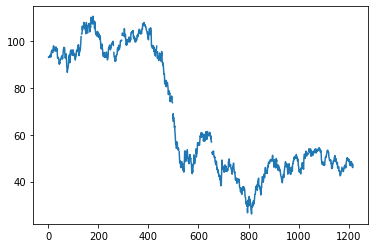

In [33]:
oil['dcoilwtico'].plot()

In [34]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [35]:
oil_data = oil.copy()
oil_data['dcoilwtico'].fillna(oil_data['dcoilwtico'].median(skipna=True), inplace=True)

In [36]:
oil_data.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [37]:
train_temp = train.copy()
oil_temp = pd.DataFrame(oil_data,columns = ['date','dcoilwtico'])
oil_train = pd.merge(train_temp,oil_temp,left_on='date',right_on = 'date',how = 'left')
oil_train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,53.19
1,1,2013-01-01,1,BABY CARE,0.000,0,53.19
2,2,2013-01-01,1,BEAUTY,0.000,0,53.19
3,3,2013-01-01,1,BEVERAGES,0.000,0,53.19
4,4,2013-01-01,1,BOOKS,0.000,0,53.19
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [38]:
oil_train.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
dcoilwtico     857142
dtype: int64

In [39]:
oil_train_fix = oil_train.dropna()
oil_train_fix.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
dtype: int64

In [40]:
from datetime import datetime
oil_train_train = oil_train_fix[oil_train_fix.date < datetime(2017, 1, 1)]
oil_train_test = oil_train_fix[oil_train_fix.date >= datetime(2017, 1, 1)]
oil_train_test = oil_train_test.reset_index()
oil_train_test.drop(columns = ['index'] , inplace = True , axis = 1)

In [41]:
oil_train_train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,53.19
1,1,2013-01-01,1,BABY CARE,0.000,0,53.19
2,2,2013-01-01,1,BEAUTY,0.000,0,53.19
3,3,2013-01-01,1,BEVERAGES,0.000,0,53.19
4,4,2013-01-01,1,BOOKS,0.000,0,53.19
...,...,...,...,...,...,...,...
2594587,2594587,2016-12-30,9,POULTRY,669.283,20,53.75
2594588,2594588,2016-12-30,9,PREPARED FOODS,99.106,2,53.75
2594589,2594589,2016-12-30,9,PRODUCE,2136.871,3,53.75
2594590,2594590,2016-12-30,9,SCHOOL AND OFFICE SUPPLIES,1.000,0,53.75


In [42]:
oil_train_test

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,2598156,2017-01-02,1,AUTOMOTIVE,5.000,0,53.19
1,2598157,2017-01-02,1,BABY CARE,0.000,0,53.19
2,2598158,2017-01-02,1,BEAUTY,0.000,0,53.19
3,2598159,2017-01-02,1,BEVERAGES,1434.000,31,53.19
4,2598160,2017-01-02,1,BOOKS,0.000,0,53.19
...,...,...,...,...,...,...,...
288679,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
288680,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
288681,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
288682,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [43]:
oil_train_test_original = oil_train_test.copy()
oil_train_test_original.drop(columns = ['date','store_nbr','family','onpromotion'] , inplace = True , axis = 1)

In [44]:
oil_train_test_original

,id,sales,dcoilwtico
0,2598156,5.000,53.19
1,2598157,0.000,53.19
2,2598158,0.000,53.19
3,2598159,1434.000,53.19
4,2598160,0.000,53.19
...,...,...,...
288679,3000883,438.133,47.57
288680,3000884,154.553,47.57
288681,3000885,2419.729,47.57
288682,3000886,121.000,47.57


In [45]:
oil_train_test_prediction = oil_train_test_original.copy()

In [47]:
oil_train_train_temp = oil_train_train.copy()
oil_train_train_sales = oil_train_train_temp['sales']
oil_train_train_temp.drop(columns = ['sales'] , inplace = True , axis = 1)
oil_train_train_category = pd.get_dummies(oil_train_train_temp, columns=['store_nbr','family'], drop_first=True)

oil_train_test.drop(columns = ['sales'] , inplace = True , axis = 1)
oil_train_test_category = pd.get_dummies(oil_train_test, columns=['store_nbr','family'], drop_first=True)

In [48]:
oil_train_train_temp

,id,date,store_nbr,family,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0,53.19
1,1,2013-01-01,1,BABY CARE,0,53.19
2,2,2013-01-01,1,BEAUTY,0,53.19
3,3,2013-01-01,1,BEVERAGES,0,53.19
4,4,2013-01-01,1,BOOKS,0,53.19
...,...,...,...,...,...,...
2594587,2594587,2016-12-30,9,POULTRY,20,53.75
2594588,2594588,2016-12-30,9,PREPARED FOODS,2,53.75
2594589,2594589,2016-12-30,9,PRODUCE,3,53.75
2594590,2594590,2016-12-30,9,SCHOOL AND OFFICE SUPPLIES,0,53.75


In [49]:
oil_train_test

,id,date,store_nbr,family,onpromotion,dcoilwtico
0,2598156,2017-01-02,1,AUTOMOTIVE,0,53.19
1,2598157,2017-01-02,1,BABY CARE,0,53.19
2,2598158,2017-01-02,1,BEAUTY,0,53.19
3,2598159,2017-01-02,1,BEVERAGES,31,53.19
4,2598160,2017-01-02,1,BOOKS,0,53.19
...,...,...,...,...,...,...
288679,3000883,2017-08-15,9,POULTRY,0,47.57
288680,3000884,2017-08-15,9,PREPARED FOODS,1,47.57
288681,3000885,2017-08-15,9,PRODUCE,148,47.57
288682,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8,47.57


In [50]:
from sklearn.preprocessing import StandardScaler
train_standard = StandardScaler()
test_standard = StandardScaler()

oil_train_train_temp2 = oil_train_train_category.copy()
train_standard.fit(oil_train_train_temp[['onpromotion']])
oil_train_standard_temp = pd.DataFrame(train_standard.transform(oil_train_train_temp2[['onpromotion']]))
oil_train_train_category [['onpromotion']] = train_standard_temp

oil_train_test_temp = oil_train_test_category.copy()
test_standard.fit(oil_train_test_temp[['onpromotion']])
oil_test_standard_temp = pd.DataFrame(test_standard.transform(oil_train_test_temp[['onpromotion']]))
oil_train_test_category [['onpromotion']] = test_standard_temp

In [51]:
oil_train_train_category.drop(columns = ['id','date'], inplace = True , axis = 1)
oil_train_test_category.drop(columns = ['id','date'], inplace = True , axis = 1)

In [52]:
from sklearn.linear_model import LinearRegression
train_model = LinearRegression()
train_model.fit(oil_train_train_category, oil_train_train_sales)

LinearRegression()

In [53]:
oil_train_test_category

,onpromotion,dcoilwtico,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288679,-0.384720,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
288680,-0.384720,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
288681,-0.328122,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
288682,-0.384720,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [54]:
oil_train_test_predict = train_model.predict(oil_train_test_category)

In [55]:
oil_train_test_category

,onpromotion,dcoilwtico,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.384720,53.19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288679,-0.384720,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
288680,-0.384720,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
288681,-0.328122,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
288682,-0.384720,47.57,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [56]:
i = 0
for predict_sales in oil_train_test_predict:
 if predict_sales<0 :
    oil_train_test_predict[i] = 0
 i = i+1
        
oil_train_test_predict

array([  0.        ,   0.        ,   0.        , ..., 981.47215452,
        85.37692438,  97.95505596])

In [57]:
oil_train_test_prediction['sales']= oil_train_test_predict

In [58]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

oil_train_test_original_sales = oil_train_test_original['sales']
oil_train_test_prediction_sales = oil_train_test_prediction['sales']

evaluation_rmsle = metrics.mean_squared_log_error(oil_train_test_original_sales, oil_train_test_prediction_sales, squared=False)
evaluation_rmsle

1.9847817157220713

In [59]:
submission_test = test.copy()
submission_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [60]:
submission_test_category = pd.get_dummies(submission_test, columns=['store_nbr','family'], drop_first=True)

submission_test_temp = submission_test_category.copy()
test_standard.fit(submission_test_temp[['onpromotion']])
test_standard_temp = pd.DataFrame(test_standard.transform(submission_test_temp[['onpromotion']]))
submission_test_category [['onpromotion']] = test_standard_temp

In [61]:
submission_test_category.drop(columns = ['id','date'], inplace = True , axis = 1)

In [62]:
submission_test_category

,onpromotion,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-0.336759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.336759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.240064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.630191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.336759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,-0.288411,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
28508,-0.336759,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28509,-0.288411,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28510,0.098369,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
temp = submission_test_category.copy()
temp.insert(1, "dcoilwtico", 0)
temp

,onpromotion,dcoilwtico,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,-0.336759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.336759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.240064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.630191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.336759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,-0.288411,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
28508,-0.336759,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
28509,-0.288411,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
28510,0.098369,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [64]:
submission_test_predict = train_model.predict(temp)
submission_test_predict

array([  46.47544487,   41.97825322,   61.63178482, ..., 1064.32408723,
        250.61195714,  182.3399925 ])

In [65]:
i = 0
for predict_sales in submission_test_predict:
 if predict_sales<0 :
    submission_test_predict[i] = 0
 i = i+1

In [66]:
submission['sales']= submission_test_predict
submission.to_csv('submission.csv',index=False)
submission

,id,sales
0,3000888,46.475445
1,3000889,41.978253
2,3000890,61.631785
3,3000891,2009.698802
4,3000892,41.950659
...,...,...
28507,3029395,437.391630
28508,3029396,248.244908
28509,3029397,1064.324087
28510,3029398,250.611957
